In [1]:
from __future__ import division#, print_function
import numpy as np
from scipy.constants import c,pi
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig
from scipy.sparse import csr_matrix, lil_matrix, csc_matrix
import matplotlib.pylab as plt
from matplotlib.colors import from_levels_and_colors
import time
from functions_dispersion_analysis import *

In [2]:
%matplotlib inline

In [3]:
a = 1e-4
b = 1e-4


In [4]:
mu_r = 1.0
lamda = 1.55e-6
r_core = 0.2e-5 # radius of core
r_clad = 5e-5 #radius of the fibre
nclad = 1.444# - 0.1e-4j# ref index of cladding
ncore = 1.5# - 1e-4j # ref index of core
neff_g = ncore # Guess of the modes
num= 20   #The number of modes guess 
#neff_g= ncore
lam_mult = 1
# Asks GMSH to create a mesh that has this number multiplied by the wavelength 
mesh_refinement = 0 # number of times to uniformly refine the mesh (used for convergence plots and better results)
vector_order = 3
nodal_order = 3

In [5]:
#from testing.Single_mode_fibre.Single_mode_theoretical import *
#neff_th, Aeff_th = main_test(ncore,nclad,lamda,r_core,r_clad)
k =0 

if k ==0:
    V = 2*pi/lamda*r_core*(ncore**2 - nclad**2)**0.5
    print(V)


3.29185791881


In [6]:
def ref(x,values = np.zeros(1)):
    point = (x[0]**2+ x[1]**2)**0.5
    if  point<= r_core:
        values[0] = ncore.real**2 - ncore.imag**2
    elif point > r_core and point <= r_clad:
        values[0] = nclad.real**2 - nclad.imag**2
    else:
        values[0] = 1.
    return values

def extinction(x,values = np.zeros(1)):
    point = (x[0]**2+ x[1]**2)**0.5
    if  point<= r_core:
        values[0] = -2*ncore.imag*ncore.real
    elif point > r_core and point <= r_clad:
        values[0] = -2*nclad.imag*ncore.real
    else:
        values[0] = 0
    return values

In [7]:
waveguide = waveguide_inputs(lamda,ref,extinction)
waveguide.fibre(True,r_core,r_clad,ncore,nclad)
k = is_loss(ncore,nclad)
box_domain = box_domains(a,a)

In [8]:
mesh = None

## Main function

In [9]:
#min_max = (-box_domain.a, box_domain.a,-box_domain.b, box_domain.b)

In [10]:

modes_vec = main(box_domain,waveguide,vector_order,nodal_order,num,neff_g,lam_mult,min_max=None,k = 0,\
                 size1 = 512,size2 = 512, mesh_plot = False,filename = 'geometry_circular.geo')
mesh = modes_vec[-1]
modes_vec =modes_vec[:-1]

Info    : Running 'gmsh fenics_mesh/Output.geo -2 -o fenics_mesh/output_small.msh' [Gmsh 2.12.0, 1 node, max. 1 thread]
Info    : Started on Thu Aug 18 09:42:02 2016
Info    : Reading 'fenics_mesh/Output.geo'...
Info    : Done reading 'fenics_mesh/Output.geo'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Circle)
Info    : Meshing curve 2 (Circle)
Info    : Meshing curve 3 (Circle)
Info    : Meshing curve 4 (Circle)
Info    : Meshing curve 5 (Circle)
Info    : Meshing curve 6 (Circle)
Info    : Meshing curve 7 (Circle)
Info    : Meshing curve 8 (Circle)
Info    : Meshing curve 9 (Circle)
Info    : Meshing curve 10 (Circle)
Info    : Meshing curve 11 (Circle)
Info    : Meshing curve 12 (Circle)
Info    : Meshing curve 13 (Circle)
Info    : Meshing curve 14 (Circle)
Info    : Meshing curve 15 (Circle)
Info    : Meshing curve 16 (Circle)
Info    : Meshing curve 17 (Circle)
Info    : Meshing curve 18 (Circle)
Info    : Meshing curve 19 (Circle)
Info    : Meshing curve 20 (Circle)
Info 

## Postprocesing

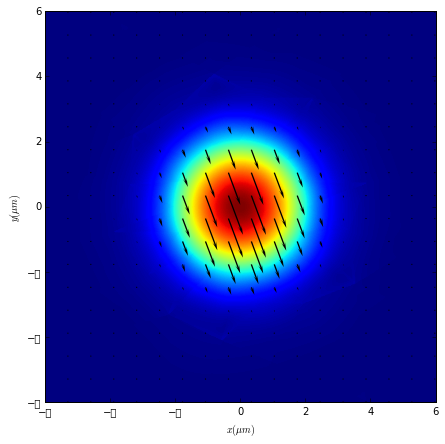

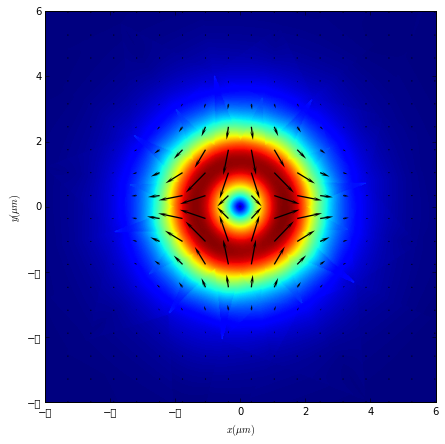

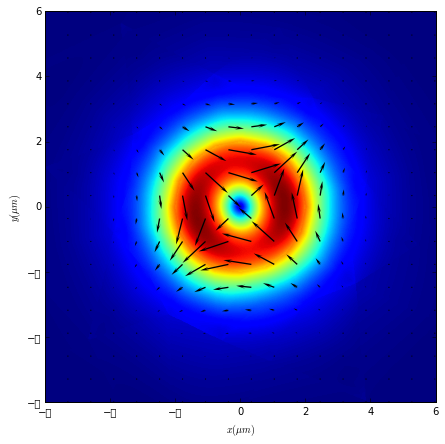

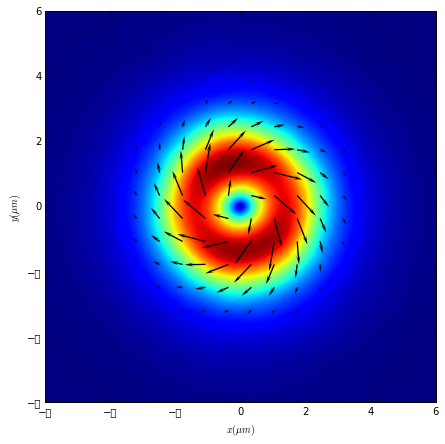

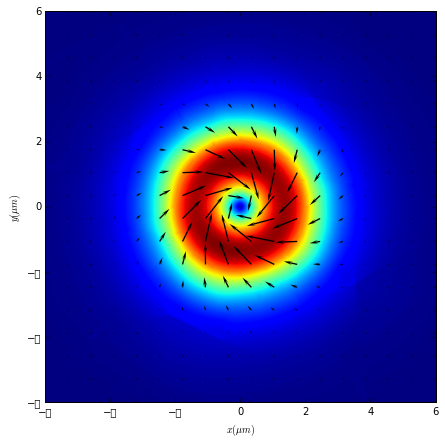

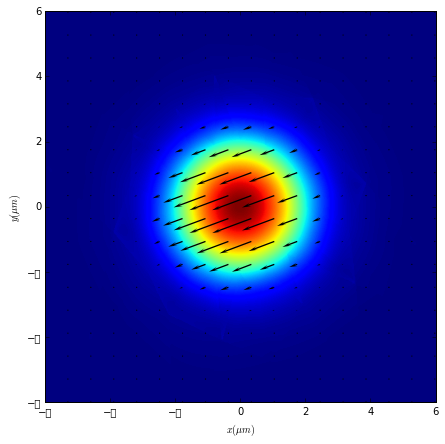

In [12]:
for mode in modes_vec:
    mode.plot_electric_field(scales = 150000*10,sp=30,cont_scale=700)
    #np.abs(neff_th - mode.neff).real
    #np.abs(neff_th - mode.neff).imag